In [1]:
from __future__ import print_function, division
import geopandas as gpd
import pandas as pd
import pylab as pl
import os
import json
import zipfile as zf
from pandas.tools.plotting import scatter_matrix
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

#s = json.load(open('https://raw.githubusercontent.com/fedhere/PUI2016_fb55/master/fbb_matplotlibrc.json'))
#pl.rcParams.update(s)
print ("Note to teacher: json.load with even full URL above not working?")

%pylab inline

Note to teacher: json.load with even full URL above not working?
Populating the interactive namespace from numpy and matplotlib


In [2]:
os.getenv("PUIDATA")

'/home/cusp/xz694/PUIdata'

In [3]:
#!curl -O https://data.cityofnewyork.us/Environment/Energy-and-Water-Data-Disclosure-for-Local-Law-84-/rgfe-8y2z  
#!curl -O https://data.cityofnewyork.us/api/views/rgfe-8y2z/rows.csv?accessType=DOWNLOAD
!curl -O https://data.cityofnewyork.us/resource/rgfe-8y2z.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  186k    0  186k    0     0   604k      0 --:--:-- --:--:-- --:--:-- 1810k


In [4]:
#test = pd.read_csv("rows.csv?accessType=DOWNLOAD")
#test = pd.read_csv("rgfe-8y2z.csv")

In [5]:
#test.columns

In [6]:
!mv "rgfe-8y2z.csv" "$PUIDATA"
#says "permission denied" but still moved the file.

mv: setting attribute `security.selinux' for `security.selinux': Permission denied


In [7]:
!mv "/home/cusp/xz694/PUIdata/rgfe-8y2z.csv" "/home/cusp/xz694/PUIdata/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv"

In [8]:
!curl -O http://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/mn_mappluto_16v1.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11.6M  100 11.6M    0     0  36.0M      0 --:--:-- --:--:-- --:--:-- 40.2M


In [9]:
!mv "mn_mappluto_16v1.zip" "$PUIDATA"
#says "permission denied" but still moved the file.

mv: setting attribute `security.selinux' for `security.selinux': Permission denied


In [10]:
zippedData = zf.ZipFile(os.getenv("PUIDATA") + "/mn_mappluto_16v1.zip")

In [11]:
zippedData.extractall(os.getenv("PUIDATA"))

In [12]:
#test = gpd.read_file(os.getenv("PUIDATA") + "/MNMapPLUTO.shp")

In [13]:
#test.columns

In [14]:
nrg = pd.read_csv(os.getenv("PUIDATA") + "/Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv")

In [15]:
bsize = gpd.read_file(os.getenv("PUIDATA") + "/MNMapPLUTO.shp")

In [16]:
nrg.columns

Index([u'Record Number', u'NYC Borough, Block, and Lot (BBL)',
       u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')

In [17]:
nrg.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,16099,4.084010e+09,NaN,4084010096,4453435,NaN,NaN,Queens,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,966.7,806.6,160.1,91968,NaN,Multifamily Housing,NaN
1,500,1.005050e+09,NaN,1005050001,1007817,150,VARICK STREET,Manhattan,10013.0,Filed,...,Yes,ABS,44,1392.3,337.9,1054.4000000000001,235370,214110.0,Distribution Center,1.0
2,5017,1.021420e+09,NaN,1021420100,1063495,4079,BROADWAY,Manhattan,10032.0,Filed,...,No,None,Not Available,673.6,541.79999999999995,131.80000000000001,64806,64816.0,Multifamily Housing,1.0
3,5116,1.021750e+09,NaN,1021750080,1064235,60,SHERMAN AVENUE,Manhattan,10040.0,Filed,...,No,None,Not Available,485,403,82,62839,62847.0,Multifamily Housing,1.0
4,363,1.003360e+09,NaN,1003360005,1088884,16,BIALYSTOKER PLACE,Manhattan,10002.0,Filed,...,No,None,Not Available,435.5,290,145.5,98000,98052.0,Multifamily Housing,1.0


In [18]:
nrg = nrg.drop('Record Number', axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb818b4a710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb815eab1d0>]], dtype=object)

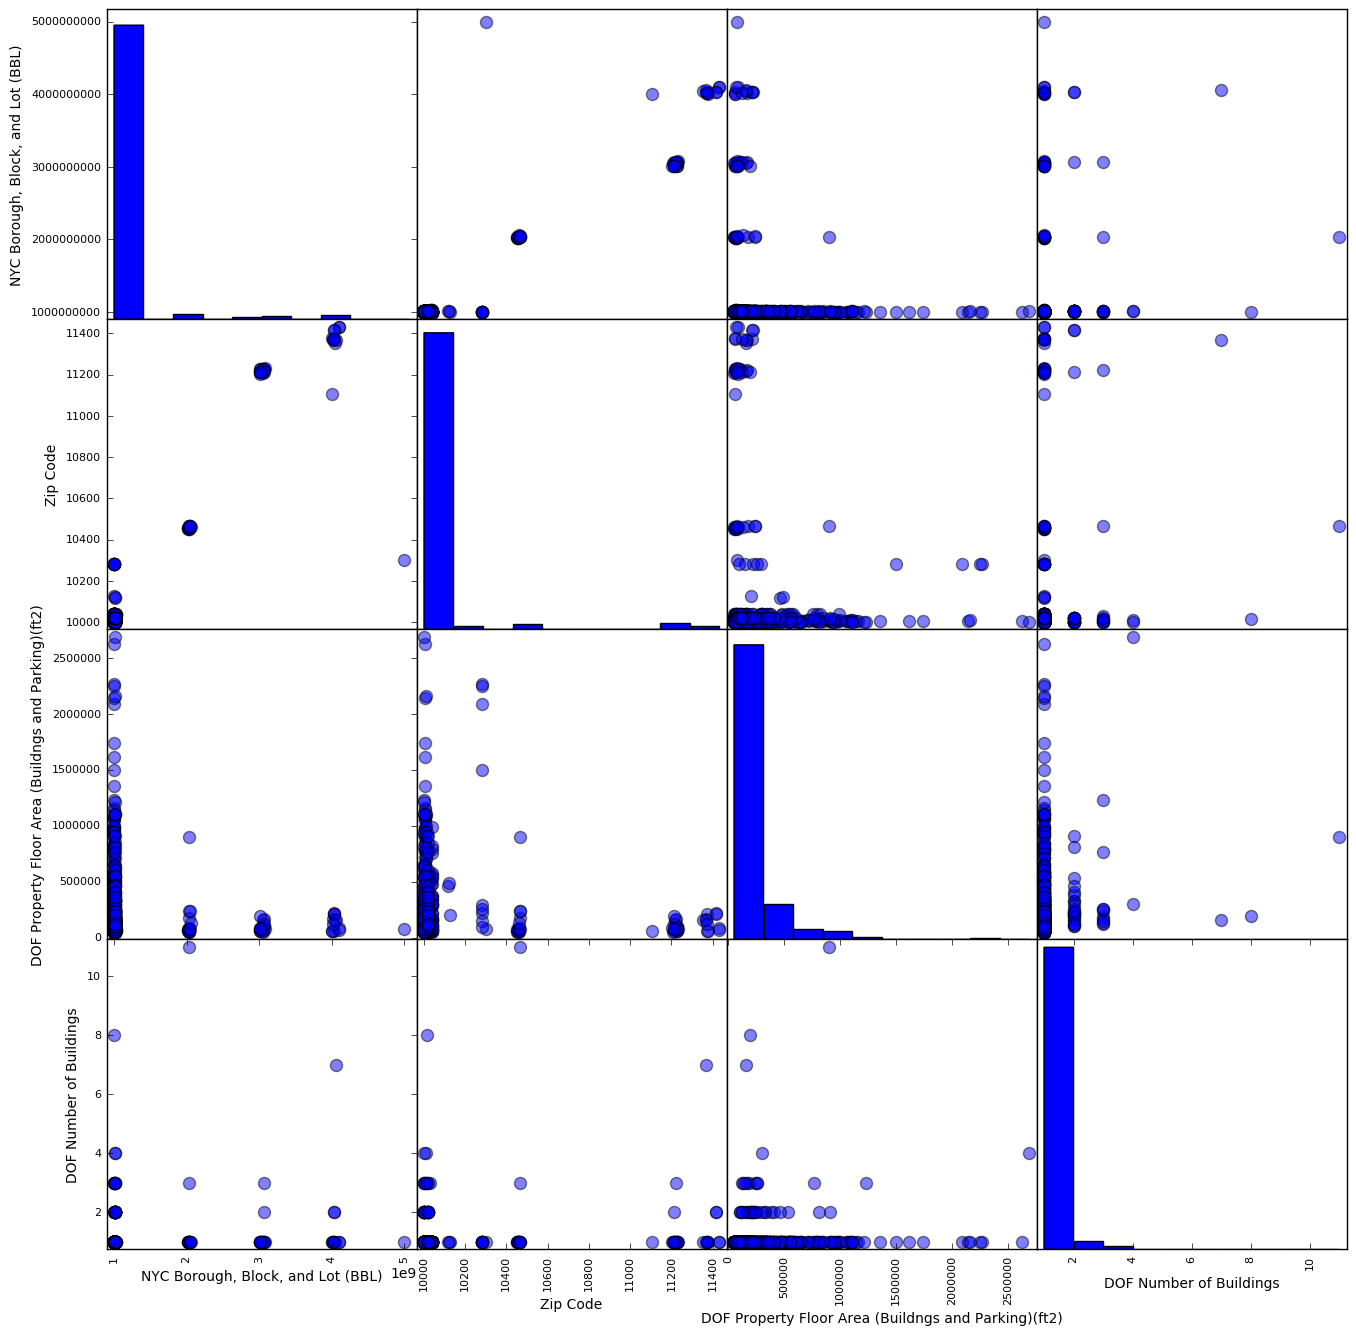

In [19]:
scatter_matrix (nrg, s=300, figsize=(16, 16))

#### Figure 1: scatter matrix of all numerical values in the files.

In [20]:
nrg = nrg.drop(['Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)',
       'Street Number', 'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status',
       'Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)', 
       'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'], axis = 1)

In [21]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,4.084010e+09,180.5,91968
1,1.005050e+09,82.1,235370
2,1.021420e+09,137.69999999999999,64806
3,1.021750e+09,103.2,62839
4,1.003360e+09,74,98000


In [22]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [23]:
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


In [24]:
bsize.BBL.astype(float)

0        1.015450e+09
1        1.007238e+09
2        1.016800e+09
3        1.013850e+09
4        1.011970e+09
5        1.002360e+09
6        1.008370e+09
7        1.001960e+09
8        1.022240e+09
9        1.011270e+09
10       1.011650e+09
11       1.021740e+09
12       1.009120e+09
13       1.007920e+09
14       1.012110e+09
15       1.011240e+09
16       1.009040e+09
17       1.010090e+09
18       1.020620e+09
19       1.020630e+09
20       1.008940e+09
21       1.005728e+09
22       1.004400e+09
23       1.019470e+09
24       1.008830e+09
25       1.020810e+09
26       1.021610e+09
27       1.008570e+09
28       1.008830e+09
29       1.020410e+09
             ...     
42667    1.014738e+09
42668    1.006208e+09
42669    1.007218e+09
42670    1.013428e+09
42671    1.019448e+09
42672    1.017298e+09
42673    1.018488e+09
42674    1.005008e+09
42675    1.020448e+09
42676    1.004518e+09
42677    1.020958e+09
42678    1.007688e+09
42679    1.008498e+09
42680    1.017298e+09
42681    1

In [25]:
bsize.UnitsTotal.astype(float)

0         18.0
1         50.0
2         10.0
3         32.0
4         26.0
5          3.0
6          8.0
7          2.0
8         30.0
9         10.0
10        39.0
11        72.0
12         5.0
13         5.0
14        10.0
15         7.0
16        16.0
17         4.0
18         3.0
19        21.0
20        10.0
21        18.0
22        22.0
23         1.0
24       108.0
25         1.0
26        30.0
27       138.0
28         8.0
29         1.0
         ...  
42667     53.0
42668     43.0
42669    731.0
42670     15.0
42671     41.0
42672     12.0
42673     14.0
42674     14.0
42675     26.0
42676     36.0
42677     50.0
42678      8.0
42679    113.0
42680     10.0
42681     11.0
42682     45.0
42683     84.0
42684      8.0
42685     19.0
42686     34.0
42687    106.0
42688     61.0
42689      6.0
42690      6.0
42691      8.0
42692     80.0
42693     27.0
42694    114.0
42695     34.0
42696    133.0
Name: UnitsTotal, dtype: float64

In [26]:
bsize = bsize.drop([u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidFAR',
       u'RetailArea', u'SHAPE_Area', u'SHAPE_Leng',    u'SPDist1',
          u'SPDist2',    u'Sanborn',  u'SanitBoro',  u'SanitDist',
         u'SanitSub', u'SchoolDist',  u'SplitZone',  u'StrgeArea',
           u'TaxMap',  u'Tract2010',   u'UnitsRes',
          u'Version',     u'XCoord',     u'YCoord', u'YearAlter1',
       u'YearAlter2',  u'YearBuilt',     u'ZMCode',    u'ZipCode',
        u'ZoneDist1',  u'ZoneDist2',  u'ZoneDist3',  u'ZoneDist4',
          u'ZoneMap',   u'geometry'], axis = 1)

In [27]:
bsize.head()

,BBL,UnitsTotal
0,1.015450e+09,18
1,1.007238e+09,50
2,1.016800e+09,10
3,1.013850e+09,32
4,1.011970e+09,26


In [28]:
nrg['Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg['Site EUI(kBtu/ft2)'], errors='coerce')

In [29]:
nrg['Reported Property Floor Area (Building(s)) (ft²)'] = pd.to_numeric(nrg['Reported Property Floor Area (Building(s)) (ft²)'], errors='coerce')

In [30]:
nrg.head()

,"NYC Borough, Block, and Lot (BBL)",Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,4.084010e+09,180.5,91968.0
1,1.005050e+09,82.1,235370.0
2,1.021420e+09,137.7,64806.0
3,1.021750e+09,103.2,62839.0
4,1.003360e+09,74.0,98000.0


In [31]:
nrg = nrg.rename(columns = {'NYC Borough, Block, and Lot (BBL)':'BBL'})

In [32]:
nrg.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²)
0,4.084010e+09,180.5,91968.0
1,1.005050e+09,82.1,235370.0
2,1.021420e+09,137.7,64806.0
3,1.021750e+09,103.2,62839.0
4,1.003360e+09,74.0,98000.0


In [33]:
bblnrgdata = pd.merge(nrg, bsize, how='inner', on='BBL')

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:2097: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  indexer = self._engine.get_indexer(target._values)


In [34]:
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsTotal
0,1.005050e+09,82.1,235370.0,24
1,1.021420e+09,137.7,64806.0,62
2,1.021750e+09,103.2,62839.0,85
3,1.003360e+09,74.0,98000.0,128
4,1.008070e+09,130.0,204417.0,10


In [35]:
bblnrgdata['EnergyTotal'] = bblnrgdata['Site EUI(kBtu/ft2)'] * bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)']

In [36]:
bblnrgdata.head()

,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsTotal,EnergyTotal
0,1.005050e+09,82.1,235370.0,24,19323877.0
1,1.021420e+09,137.7,64806.0,62,8923786.2
2,1.021750e+09,103.2,62839.0,85,6484984.8
3,1.003360e+09,74.0,98000.0,128,7252000.0
4,1.008070e+09,130.0,204417.0,10,26574210.0


(0, 1000)

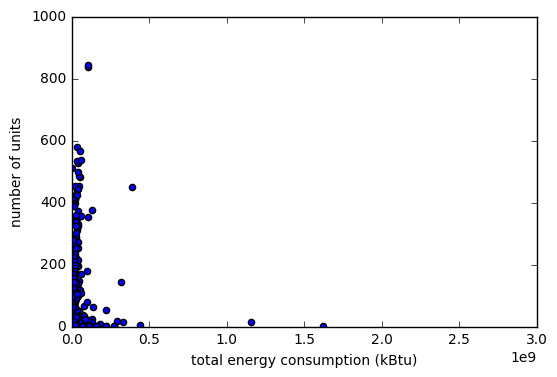

In [37]:
ax1 = bblnrgdata.plot(x='EnergyTotal', y='UnitsTotal', kind='scatter')

ax1.set_xlabel("total energy consumption (kBtu)")
ax1.set_ylabel("number of units")

ax1.set_xlim(0,3e9)
ax1.set_ylim(0,1000)

#When the ranges are not adjusted, the plot automatically shows some negative parts on the x and y axes as well, why?
#linewidth=0.0?
#.plot methods? pl methods? .plot.scatter? geopandas plotting?

#### Figure 2: Plotting total energy consumption against number of units

(1, 600)

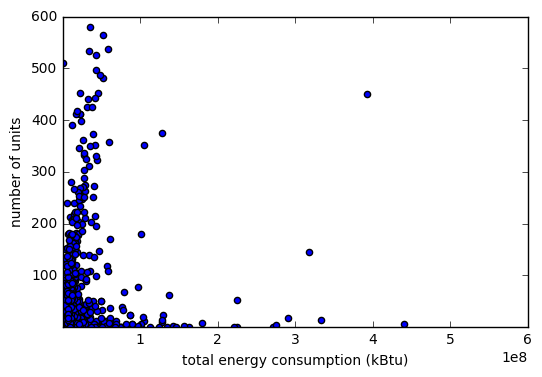

In [38]:
ax2 = bblnrgdata.plot(x='EnergyTotal', y='UnitsTotal', kind='scatter')
ax2.set_xlabel("total energy consumption (kBtu)")
ax2.set_ylabel("number of units")

ax2.set_xlim(1000,6e8)
ax2.set_ylim(1,600)

#pl.axis([0,1,0,1000]) #
#pl.axis([1000, 1e10, 1, 1000]) #...
#pl.axis method vs. set lims?

#### Figure 3: Plotting total energy consumption against number of units (zoomed in)

In [39]:
bblnrgdata_cut = bblnrgdata[(bblnrgdata['EnergyTotal'] > 0) & (bblnrgdata['UnitsTotal'] < 1000) 
                            & (bblnrgdata['UnitsTotal'] > 0)]

In [40]:
#pl.figure()

(1, 1000)

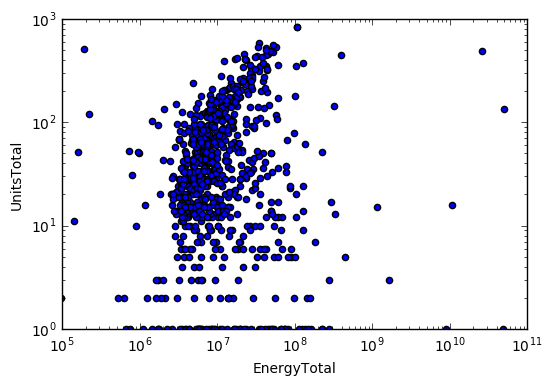

In [41]:
ax3 = bblnrgdata_cut.plot(x='EnergyTotal', y='UnitsTotal', kind="scatter", loglog=True)

ax3.set_xlim(1e5, 1e11)
ax3.set_ylim(1, 1000)

#ax3.set_xlim([10, 10**3])
#ax3.set_ylim([10**4, 10**11]) #some more expression ways testing..

#pl.axis([10, 10**3, 10**4, 10**11])

#pl.figure()...

#the initial plot. Why top and bottom lines looking?...

#### Figure 4: Log plot for total energy consumption against number of units

(1, 1000)

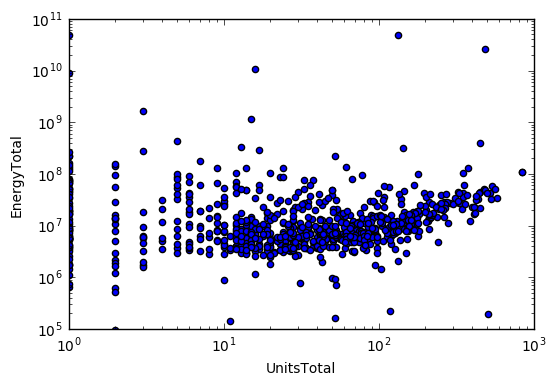

In [42]:
ax4 = bblnrgdata_cut.plot(x='UnitsTotal', y='EnergyTotal', kind="scatter", loglog=True)

ax4.set_ylim(1e5, 1e11)
ax4.set_xlim(1, 1000)

#subplot in relation to pl.figure() etc...
#How come mine is looking the other way, the two graphs~

#### Figure 5: Log plot for number of units against total energy consumption

## BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:
if you used statsmodels it would look something like this:


In [ ]:
X = sm.add_constant(np.log10(x))
linmodel = sm.OLS(np.log10(y), X, missing='drop').fit() # ignores entires 
                                                     # where x or y is NaN

## choose wisely which is your DEPENDENT and which is your INDEPENDENT variable. 
both for what you want to do logically (what changes as a functino of what) but also based on which variable has a 'sensible' distribution that allows you to fit a function to it: **you need your independent variable to span a large range, and to be spread somewhat evenly in the range, rather than just clustered in a spot** so in this case switching the independent and dependent variable may be a good idea.



1. **Fit a line** to Units vs Energy.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



In [ ]:
# fits and plots here
# your plots should show datapoints (as scatter plot) and models (as lines)

In [ ]:
# my OLS summary. 
# Yours may be somewhat different depending on how you cut the data

In [ ]:
print ("LR : ", -2 * (-linemodel.llf - (-curvemodel.llf)))
print ("LR from statsmodels:", curvemodel.compare_lr_test(linemodel))

## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

In [ ]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.

In [ ]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)